In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Preprocessing

In [3]:
df.isna().sum().sum()

120

In [4]:
df.dropna(inplace=True)
df.isna().sum().sum()

0

In [12]:
X = df.drop('medv', axis=1)
y = df['medv']

scaler = StandardScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reset indices for both X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (315, 13)
y_train shape: (315,)
X_test shape: (79, 13)
y_test shape: (79,)


# Build the network

In [16]:
class Neural_Network:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate):
        self.weights_input_hidden = np.random.uniform(-0.5, 0.5, (hidden_neurons, input_neurons))
        self.weights_hidden_output = np.random.uniform(-0.5, 0.5, (output_neurons, hidden_neurons))
        self.learning_rate = learning_rate
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, inputs):
        # convert inputs to matrics shape
        self.inputs = np.array(inputs, ndmin=2).T
        
        # z = w.x
        hidden_inputs = np.dot(self.weights_input_hidden, self.inputs)
        self.hidden_outputs = self.sigmoid(hidden_inputs)
        # layer one end
        
        final_inputs = np.dot(self.weights_hidden_output, self.hidden_outputs)
        final_outputs = final_inputs
        return final_outputs
    
    def backward(self, target, prediction):
        output_error = target - prediction.T
        hidden_grad = np.dot(self.weights_hidden_output.T, output_error) * (self.hidden_outputs * (1-self.hidden_outputs))
        
        self.weights_hidden_output += (self.learning_rate) * output_error * self.hidden_outputs.T
        self.weights_input_hidden += (self.learning_rate) * hidden_grad * self.inputs.T
        
    
    def MSE(self, target, prediction):
        return (np.sum(target - prediction)**2) / len(target)

In [23]:
input_neurons = X_train.shape[1]
hidden_neurons = 32
output_neurons = 1
learning_rate = 0.01
epochs = 1000
model = Neural_Network(input_neurons, hidden_neurons, output_neurons, learning_rate)

In [24]:
losses = {'train': [], 'test': []}

for epoch in range(epochs):
    batch = np.random.choice(X_train.index, 8, replace=False)
    for features, target in zip(X_train.loc[batch].values, y_train.loc[batch].values):
        preds = model.forward(features)
        model.backward(target, preds)
    losses['train'].append(model.MSE(y_train, model.forward(X_train)[0]))
    losses['test'].append(model.MSE(y_test, model.forward(X_test)[0]))

In [25]:
result = pd.DataFrame()
result['Actual'] = y_test.values
result['Predictions'] = model.forward(X_test)[0]
result['Error'] = abs(result['Actual'] - result['Predictions'])
result

,Actual,Predictions,Error
0,18.2,17.020518,1.179482
1,14.4,14.852409,0.452409
2,23.1,22.229169,0.870831
3,18.5,19.009955,0.509955
4,24.3,19.397249,4.902751
...,...,...,...
74,14.4,12.165297,2.234703
75,13.3,16.586001,3.286001
76,39.8,35.051940,4.748060
77,24.8,25.317686,0.517686


In [26]:
MAE = result['Error'].sum() / len(result)
MAE

3.109165526135204

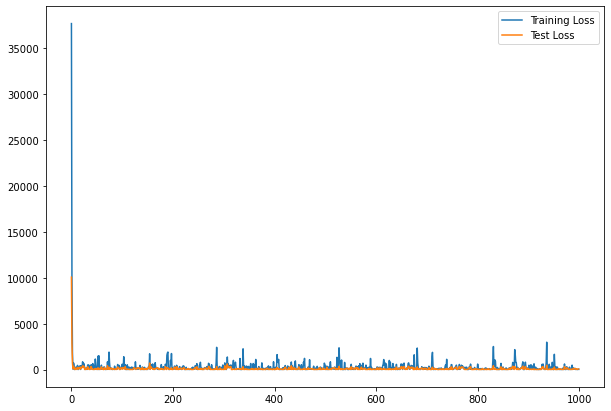

In [35]:
# Plot Training
plt.figure(figsize=(10, 7))
plt.plot(losses['train'], label='Training Loss')
plt.plot(losses['test'], label='Test Loss')
plt.legend()
plt.show()

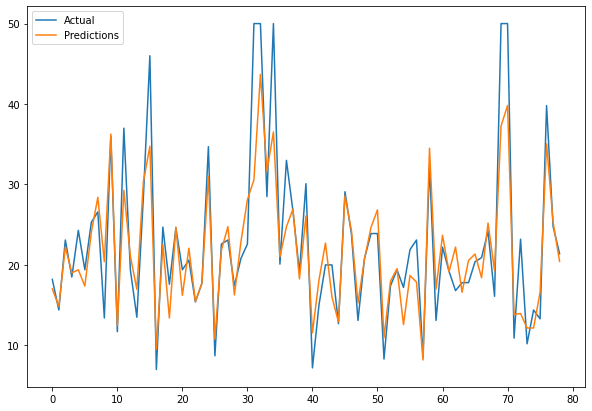

In [36]:
# Plot Result
plt.figure(figsize=(10, 7))
plt.plot(result['Actual'], label='Actual')
plt.plot(result['Predictions'], label='Predictions')
plt.legend()
plt.show()